# Background Data

**Desription Features**

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``store_and_fwd_flag``     | Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Y berarti "simpan dan lanjutkan", N berarti bukan perjalanan "simpan dan lanjutkan".                                                                                                                    |
|``RatecodeID``             | Kode tarif untuk perjalanan.                                                                                                  |
|                           |1 = Tarif standar                                                                                                              |
|                           |2 = JFK                                                                                                                        |
|                           |3 = Newark                                                                                                                     |
|                           |4 = Nassau atau Westchester                                                                                                    |
|                           |5 = Tarif yang dinegosiasikan                                                                                                  |
|                           |6 = Perjalanan kelompok.                                                                                                       |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``passenger_count``        | Jumlah penumpang di dalam kendaraan.                                                                                          |
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``fare_amount``            | Tarif yang diukur untuk perjalanan.                                                                                           |
|``extra``                  | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.            |
|``mta_tax``                | Pajak MTA sebesar 0,50 dolar yang otomatis aktif berdasarkan tarif yang diukur yang digunakan.                                |
|``tip_amount``             | Jumlah tip. Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.                                       |
|``tolls_amount``           | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                                                    |
|``ehail_fee``              | Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.           |
|``improvement_surcharge``  | Biaya tambahan sebesar 0,30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015.      |
|``total_amount``           | Jumlah total yang dikenakan kepada penumpang. Bidang ini mencakup tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount ditambah biaya tambahan ehail atau improvement_surcharge.                                                                                                   |
|``payment_type``           | Kode numerik yang menunjukkan metode pembayaran.                                                                              |
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1 = Street-hail                                                                                                               |
|                           | 2 = Dispatch                                                                                                                  |
|``congestion_surcharge``   | Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019.                                                                                                                                  |

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("tab10")

## Load Dataset

In [2]:
with open(r'..\data\raw\NYC TLC Trip Record.csv', 'r')as file:
    trip = pd.read_csv(file)

with open(r'..\data\ext\taxi_zone_lookup.csv', 'r')as file:
    location = pd.read_csv(file)

In [3]:
df_trip = trip.copy()
df_trip.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [4]:
df_loc = location.copy()
df_loc.fillna('Unknown', inplace=True)
df_loc.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,Unknown
264,265,Unknown,Unknown,Unknown


In [5]:
df = pd.merge(df_trip, df_loc.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
df = pd.merge(df, df_loc.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")
print('Total data: ', len(df))
df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


# Skimming Data

In [6]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0.000,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


## Missing Values Distribution

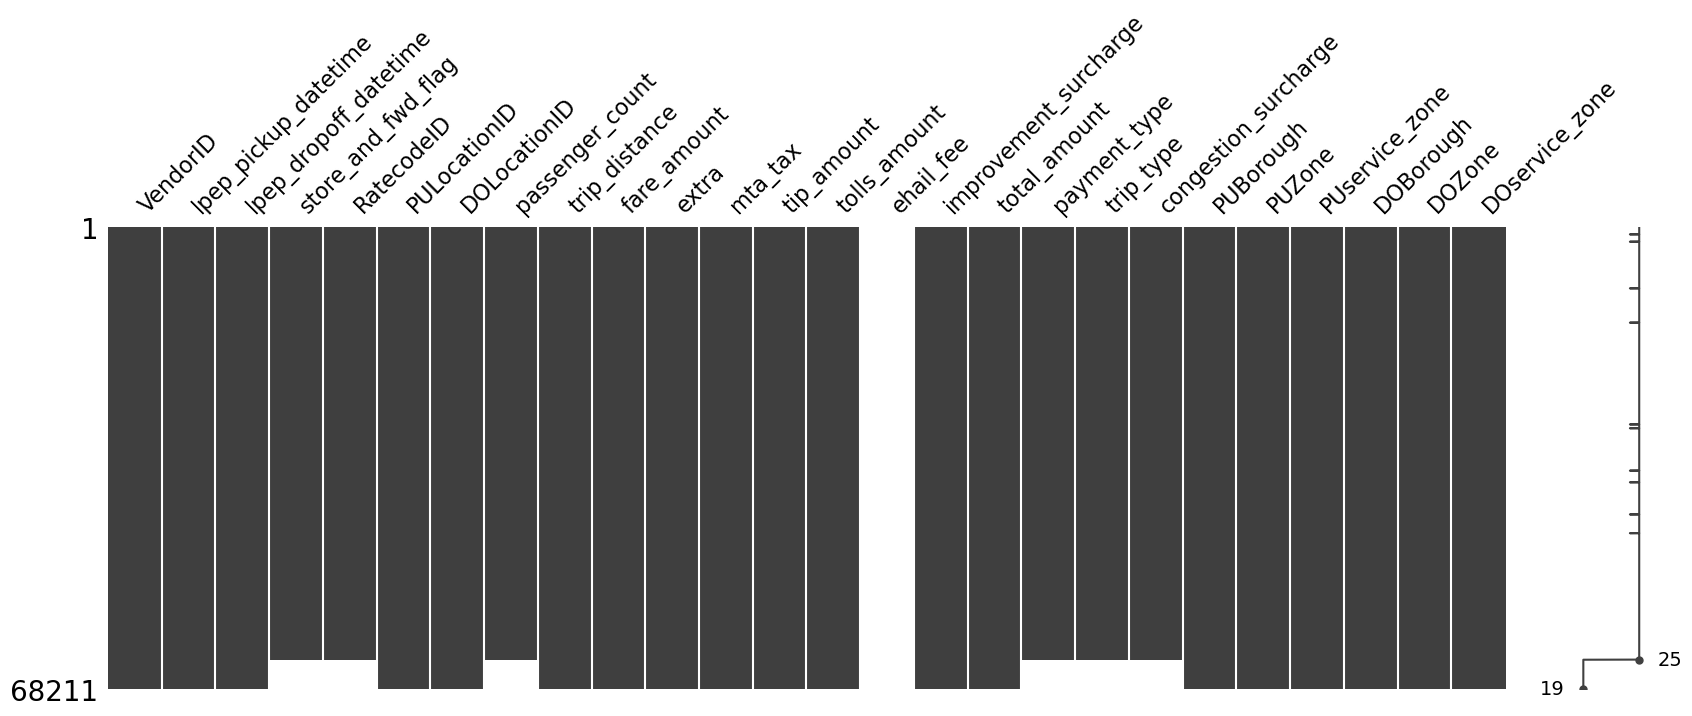

In [7]:
msno.matrix(df, figsize=(20, 6))
plt.show()

- Berdasarkan matrix di atas, kita bisa berasumsi bahwa missing value terdapat pada posisi baris yang sama selain kolom ehail fee.

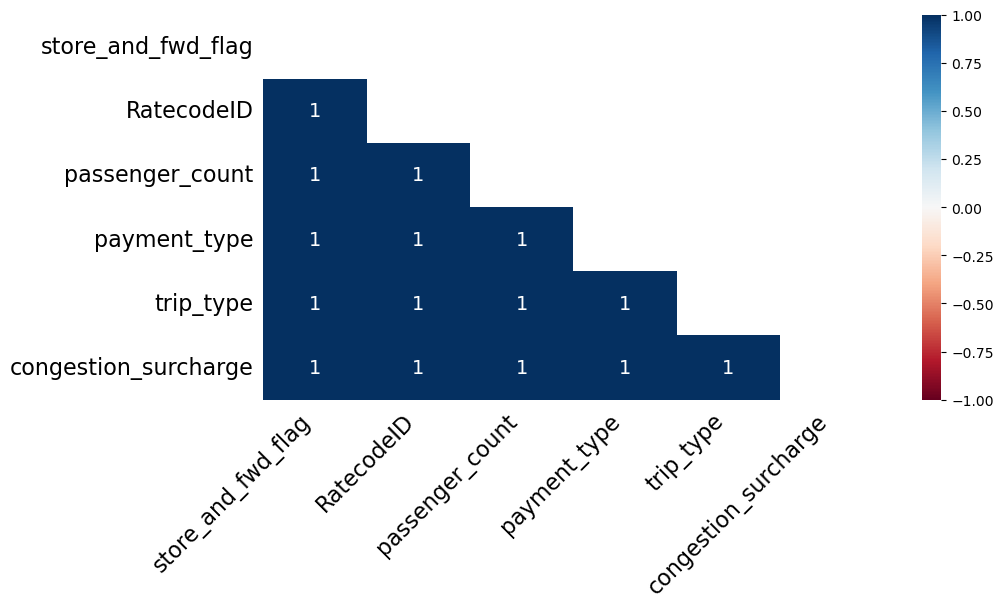

In [8]:
msno.heatmap(df, figsize=(10, 5))
plt.show()

- Berdasarkan heatmap di atas, relasi missing value yang bernilai satu yang atinya ketika terdapat kolom missing value pada baris tertentu maka kolom lainnya juga missing.

# Exploratory Data Analysis

## Data Distribution

In [9]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


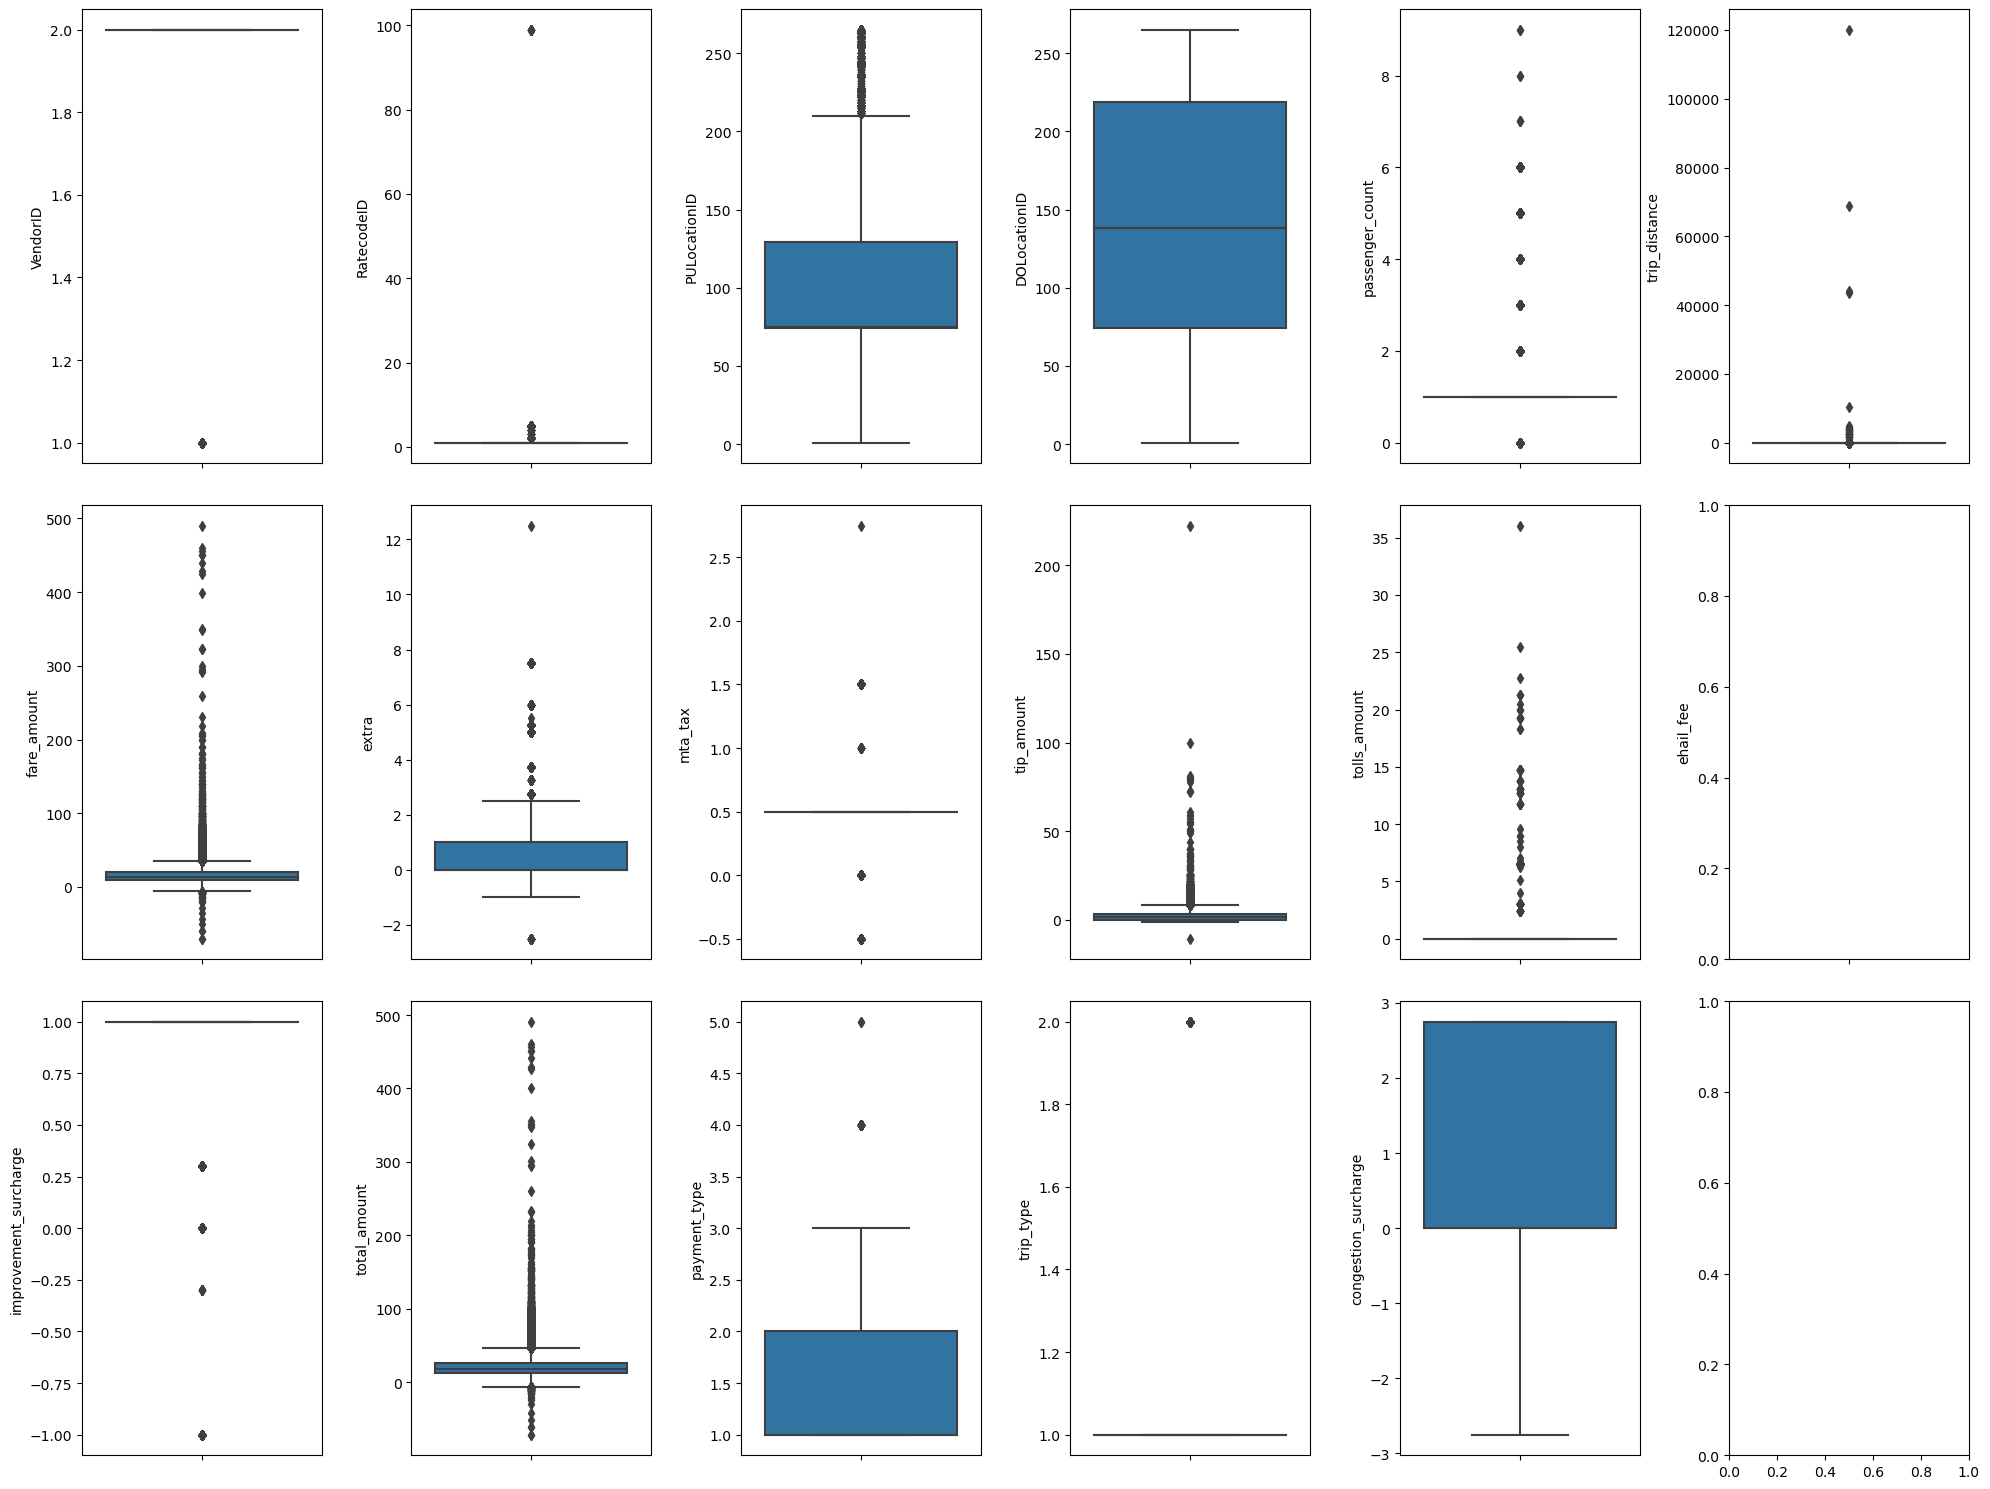

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20,15))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

- Berdasarkan boxplot di atas, dapat disimpulkan dataset terdapat banyak outliers dan tidak ada satupun yang terdistribusi normal.

- Drop data dan fitur yang tidak diperlukan untuk analisis data

In [11]:
df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'], axis=1, inplace=True)
print('Total data: ', len(df))
df.head()

Total data:  68211


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North


## Data Correlation

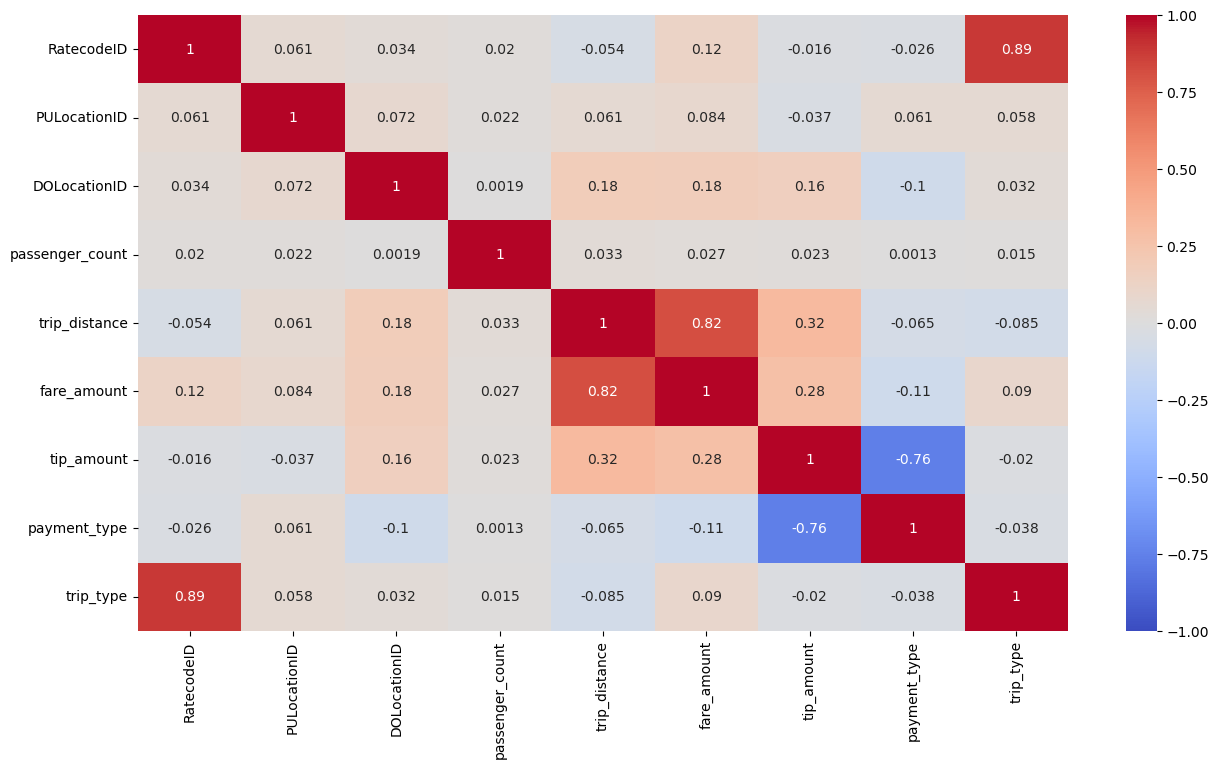

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

# Data Cleaning

## Duplicate Value

In [13]:
df[df.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
30233,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1.0,2.34,0.0,0.0,2.0,1.0,Bronx,University Heights/Morris Heights,Bronx,East Tremont
30248,2023-01-16 04:11:30,2023-01-16 04:12:44,1.0,78,78,1.0,0.17,0.0,0.0,2.0,1.0,Bronx,East Tremont,Bronx,East Tremont
36901,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1.0,24.14,0.0,0.0,2.0,1.0,Manhattan,Central Park,Staten Island,Bloomfield/Emerson Hill


In [14]:
df.drop_duplicates(inplace= True)
df[df.duplicated()].sum()

lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
payment_type             0.0
trip_type                0.0
PUBorough                0.0
PUZone                   0.0
DOBorough                0.0
DOZone                   0.0
dtype: float64

- Dilihat dari keseluruhan fitur record sudah tidak ada data duplicate value. Namun dengan asumsi bahwa duplicate value juga dapat dinilai berdasarkan beberapa fitur diantaranya :

    `lpep_pickup_datetime` , `lpep_dropoff_datetime` , `RatecodeID` , `PULocationID` , `DOLocationID` , `passenger_count` , `trip_distance`

- Berdasarkan fitur-fitur tersebut, jika memiliki value yang sama maka dapat disimpulkan bahwa data tersebut sebenarnya merupakan record yang sama (duplicate value)

In [15]:
duplicate_value = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicate_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,4.0,2.0,Unknown,NV,Unknown,NV


- Jika memeriksa duplicate berdasarkan subset(fitur-fitur) tersebut maka akan terdapat duplicate value dimana value pertama bernilai amount yang negatif, sementara value kedua bernilai amount yang positif. 

- Drop value yang negatif dan tetap menjaga value yang positif.

In [16]:
dup_negatif_val = duplicate_value[df['fare_amount']<0]
dup_negatif_val 

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.5,0.0,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.7,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,-3.0,0.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63544,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


In [17]:
df.drop(dup_negatif_val.index, inplace=True)

In [18]:
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'])]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


## Negative Values

In [19]:
pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,neg_value(%)
0,lpep_pickup_datetime,0.000
1,lpep_dropoff_datetime,0.000
2,RatecodeID,0.000
3,PULocationID,0.000
4,DOLocationID,0.000
5,passenger_count,0.000
6,trip_distance,0.000
7,fare_amount,0.007
8,tip_amount,0.000
9,payment_type,0.000


- Masih terdapat nilai negatif value pada fitur fare amount

- Nilai dari fitur fare amount diabsolutkan

In [20]:
negatif_val  = df[df['fare_amount']<0]
df.loc[negatif_val.index, 'fare_amount'] = df['fare_amount'].abs()

## Zero Values

In [21]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,data_type,0_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.494
6,trip_distance,float64,4.822
7,fare_amount,float64,0.118
8,tip_amount,float64,42.117
9,payment_type,float64,0.000


- Terdapat beberapa fitur yang bernilai 0, untuk tip amount itu memungkinkan bernilai 0 yang artinya penumpang tidak memberi tip

- Mengubah value 0 pada jumlah penumpang dengan central tendency (median) dari fitur tersebut.

- Seleksi data yang memiliki fare_amount > 0 dan trip_distance > 0

In [22]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]

## Missing Values

In [23]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100
}).round(3)

,feature,data_type,null_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,6.443
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,6.443
6,trip_distance,float64,0.000
7,fare_amount,float64,0.000
8,tip_amount,float64,0.000
9,payment_type,float64,6.443


Berdasarkan https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
- Tarif di layar adalah `"Rate #01 – Standard City Rate"` dalam batas Kota.

- Perjalanan antara Manhattan dan Bandara John F. Kennedy (JFK) di kedua arah, Pesan tarif di layar akan berbunyi `"Rate #2- JFK Airport"`

- Perjalanan ke Bandara Newark (EWR), Pesan tarif di layar seharusnya berbunyi `"Rate #3 - Newark Airport"`

- Setelah taksi melampaui batas Kota ke Nassau atau Westchester, pesan tarif di layar akan berbunyi `"Rate #04 – Out of City Rate to Nassau or Westchester"`

- Titik Lain di Luar Kota. Pesan tarif di layar seharusnya berbunyi `"Rate #05 – Out of City Negotiated Flat Rate"`


In [24]:
df['RatecodeID'].value_counts()

1.0     59400
5.0       955
2.0       131
4.0        53
3.0        20
99.0       10
Name: RatecodeID, dtype: int64

In [25]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      37
Manhattan  Unknown       7
Bronx      Unknown       2
Manhattan  Manhattan     2
Unknown    Unknown       2
Brooklyn   Unknown       1
Manhattan  EWR           1
Unknown    Queens        1
dtype: int64

- Berdasarkan informasi di atas, diketahui bahwa value unknown tersebut kemungkinan besar adalah Kota Nassau atau Westchester

- Namun karena analisis ini hanya fokus terhadap kota New York maka data untuk tujuan Nassau atau Wetchester akan di drop

- Sebelum didrop, ada beberapa kesalahan record harus ditangani pada ratecode tersebut


In [26]:
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']=='EWR'), 'RatecodeID'] = 3
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']!='Unknown'), 'RatecodeID'] = 1

In [27]:
df.drop(df[df['PUBorough']=='Unknown'].index, inplace=True)
df.drop(df[df['DOBorough']=='Unknown'].index, inplace=True)

In [28]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

In [29]:
df['RatecodeID'].fillna(1, inplace=True)
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

1.0    63327
5.0      878
2.0      170
3.0       16
Name: RatecodeID, dtype: int64
Total NaN values:  0


- Mengisi missing value pada jumlah penumpang dengan nilai median pada fitur tersebut.

In [30]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

1.0    55486
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: passenger_count, dtype: int64
Total NaN values:  0


- Berdasarkan background data, kita mengetahui bahwa tip untuk metode kartu kredit akan terisi secara otomatis. maka dapat disimpulkan jika tips > 0 maka metode yang digunakan adalah kartu kredit.

- Isi sisa missing value dengan opsi unknown yang tersedia

In [31]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

1.0    38278
2.0    21690
3.0      221
4.0       49
Name: payment_type, dtype: int64
Total NaN values:  4153


In [32]:
df[(df['tip_amount']>0)]['payment_type'].value_counts()

1.0    34706
2.0        1
Name: payment_type, dtype: int64

In [33]:
df.loc[(df['tip_amount']>0) & (df['payment_type']==2), 'payment_type'] = 1
df[(df['tip_amount']>0)]['payment_type'].value_counts()

1.0    34707
Name: payment_type, dtype: int64

In [34]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
df['payment_type'].value_counts()

1.0    41994
2.0    21689
5.0      438
3.0      221
4.0       49
Name: payment_type, dtype: int64

- Berdasarkan korelasi heatmap saat skimming, fitur trip_type sangat dipengaruhi oleh RatecodeID dengan nilai korelasi sebesar 0,89

In [35]:
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        59205
           2.0            2
2.0        1.0          129
3.0        1.0           15
5.0        1.0          111
           2.0          767

In [36]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4120
2.0,41
3.0,1


- Bedasarkan informasi dari dataset dataset bahwa RatecodeID = 1, 99% memiliki tipe perjalanan (trip_type) dengan value 1, sedangkan ratecode 2 dan 3 semuanya memiliki trip_type 1. Data yang memiliki missing value pada fitur trip_type memiliki value RatecodeID yaitu 1, 2 dan 3. 

- Maka isi missing value pada fitur trip_type dengan nilai 1

In [37]:
df['trip_type'].fillna(1, inplace=True)
df['trip_type'].value_counts()

1.0    63622
2.0      769
Name: trip_type, dtype: int64

In [38]:
print('Total data:', len(df))
df.head()

Total data: 64391


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East


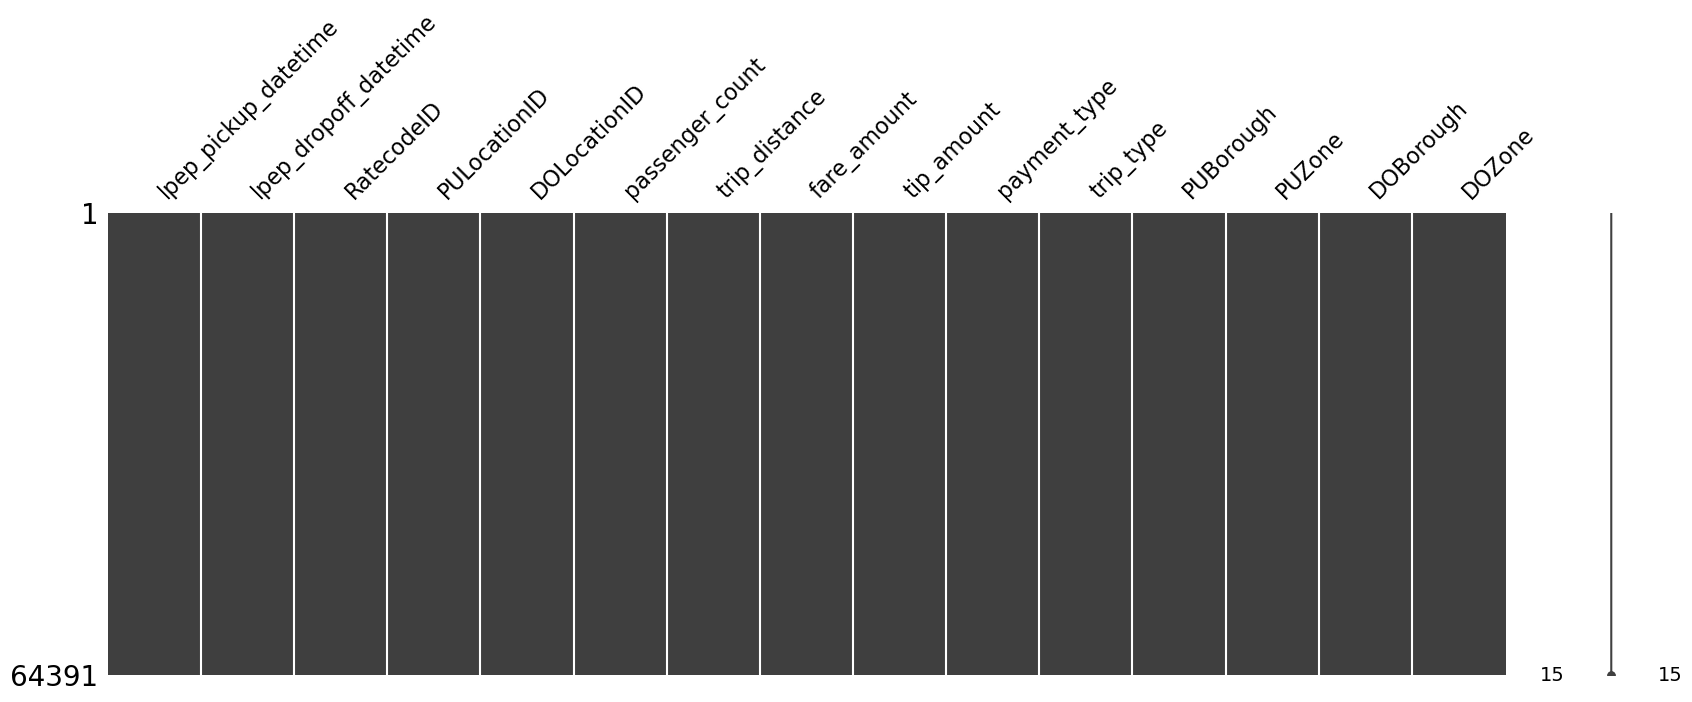

In [39]:
msno.matrix(df, figsize=(20, 6))
plt.show()

# Formatting & Outliers Handling

## Pick up and Drop off Datetime

In [40]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [41]:
outliers = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [42]:
df.drop(outliers.index, inplace=True)

In [43]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


In [44]:
time_bins = [0, 5, 11, 15, 20, 24] 
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
df['pickup_time'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

df['day_category'] = df['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

## RatecodeID

In [45]:
df['RatecodeID'] = df['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
df['RatecodeID'].value_counts()

Standard rate      63324
Negotiated fare      877
JFK Airport          170
Newark Airport        16
Name: RatecodeID, dtype: int64

## Passengers Count

In [46]:
df['passenger_count'].value_counts()

1.0    55483
2.0     4869
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: passenger_count, dtype: int64

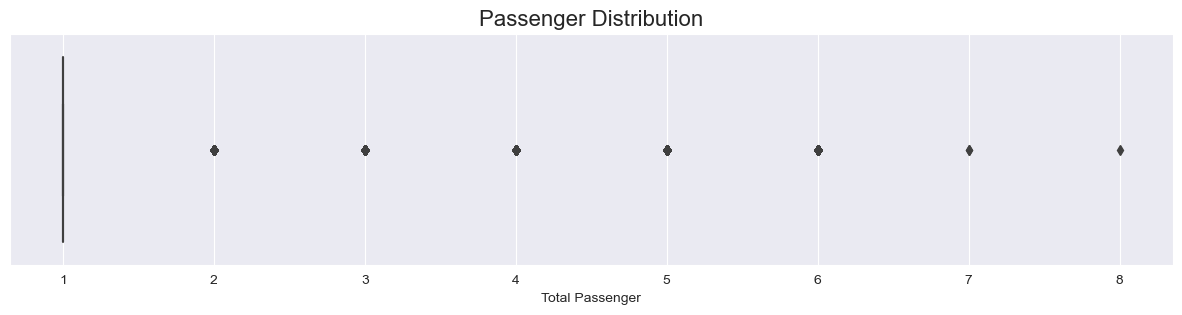

In [47]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='passenger_count', color=color[0])
plt.xlabel('Total Passenger')
plt.title('Passenger Distribution', fontsize=16)

plt.show()

- Berdasarkan peraturan https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

    Jumlah maksimum penumpang yang diperbolehkan dalam taksi adalah 4 atau 5 penumpang, kecuali penumpang tambahan harus diterima jika demikian. penumpang berusia di bawah tujuh (7) tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang.

In [48]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>3' if x>3 else str(x))
df['passenger_count'].value_counts()

1.0    55483
2.0     4869
>3      3138
3.0      897
Name: passenger_count, dtype: int64

## Trip Distance

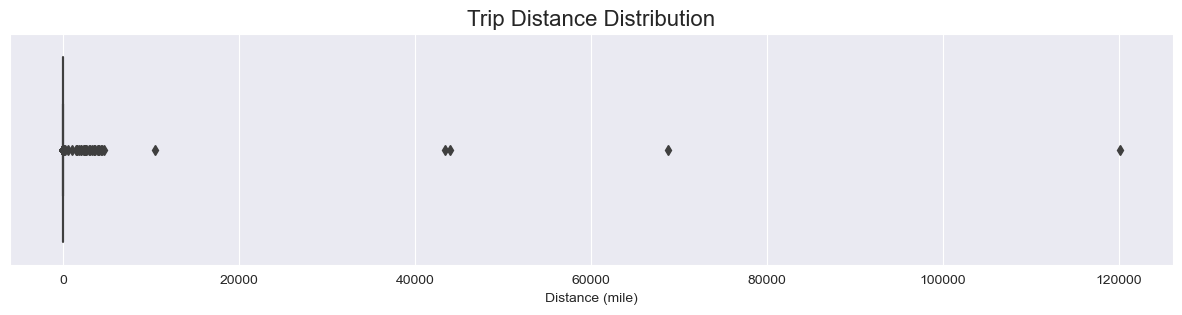

In [49]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

- Dengan anggapan bahwa taksi yang menempuh jarak kurang dari 1 km (0,62 miles) merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop

In [50]:
print('Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles):', len(df[df['trip_distance']<0.62]))
df = df[df['trip_distance']>0.62]

Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles): 3465


- Terdapat extreme outliers pada data jarak perjalanan taxi

- Pertama ubah terlebih dahulu extreme outliers tersebut

In [51]:
df[df['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True).head()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount
7322,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44
63995,2023-01-01 12:35:00,2023-01-01 12:58:00,181,137,579.63,28.49
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,26,37,1082.45,49.80


- Dapat di lihat dari data extreme otliers di atas dimana terdapat jarak lebih dari 120 miles

In [52]:
outliers = df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']]
print('Total outliers:',len(outliers))
outliers.head()

Total outliers: 38


,PULocationID,DOLocationID,trip_distance
7322,134,134,66.18
33373,82,236,1571.97
63995,181,137,579.63
64446,193,140,2555.47
64558,49,65,3077.89


- Kita akan coba ubah data extreme outliers di atas dengan nilai central tendency (median) dari trip_distance untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [53]:
ct_distance_byid = df[df['trip_distance']<50].groupby(['PULocationID', 'DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                            avg_distance=('trip_distance', 'mean'),
                                                                                            median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byid.sample(7, random_state=3)

,PULocationID,DOLocationID,count,avg_distance,median_distance
4180,220,127,2,8.5950,8.595
1947,80,87,2,6.5800,6.580
4548,244,92,1,13.2200,13.220
4112,212,248,1,0.6600,0.660
737,41,120,4,2.7625,2.775
3833,189,17,2,1.6900,1.690
285,25,24,2,11.2100,11.210


In [54]:
distance_byid = pd.merge(outliers, ct_distance_byid, on=['PULocationID', 'DOLocationID'], how='left')
distance_byid.drop(columns='count', axis=1, inplace=True)
distance_byid.index = outliers.index
display(distance_byid.head(5))

print('Hasil Inputasi:')
df.loc[outliers.index, 'trip_distance'] = distance_byid['median_distance']
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'trip_distance']].head()

,PULocationID,DOLocationID,trip_distance,avg_distance,median_distance
7322,134,134,66.18,1.129205,0.910
33373,82,236,1571.97,8.023333,8.080
63995,181,137,579.63,7.460000,7.460
64446,193,140,2555.47,2.410000,2.470
64558,49,65,3077.89,1.025000,1.025


Hasil Inputasi:


,PULocationID,DOLocationID,trip_distance
7322,134,134,0.910
33373,82,236,8.080
63995,181,137,7.460
64446,193,140,2.470
64558,49,65,1.025


- Terdapat beberapa entry yang tidak memilki record Location ID yang sama di dataset sehingga akan menyebabkan pengisian NaN values

- Untuk mengatasi masalah tersebut hampir sama dengan metode sebelumnya, perbedaanya kali ini menggunakan median dengan referensi wilayah (Borough) untuk inputasi

In [55]:
isna = df.loc[df['trip_distance'].isna()][['PUBorough', 'DOBorough', 'trip_distance']]
isna

,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,NaN
65306,Brooklyn,Queens,NaN
65491,Bronx,Manhattan,NaN
66344,Brooklyn,Brooklyn,NaN
66580,Brooklyn,Manhattan,NaN
66724,Manhattan,Bronx,NaN
67307,Bronx,Bronx,NaN


In [56]:
ct_distance_byborough = df[df['trip_distance']<70].groupby(['PUBorough', 'DOBorough']).agg(count=('trip_distance', 'count'), avg_distance=('trip_distance', 'mean'), median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byborough.sample(5, random_state=4)

,PUBorough,DOBorough,count,avg_distance,median_distance
20,Staten Island,Brooklyn,1,11.390000,11.39
19,Queens,Queens,14119,2.674917,1.97
0,Bronx,Bronx,519,3.085096,2.52
3,Bronx,Queens,25,12.287600,10.36
6,Brooklyn,EWR,7,15.090000,15.08


In [57]:
distance_byborough = pd.merge(isna, ct_distance_byborough, on=['PUBorough', 'DOBorough'], how='left')
distance_byborough.index = isna.index
display(distance_byborough)

print('Hasil Inputasi:')
df.loc[isna.index, 'trip_distance'] = distance_byborough['median_distance'].round(2)
display(df.loc[isna.index][['PUBorough', 'DOBorough', 'trip_distance']])

,PUBorough,DOBorough,trip_distance,count,avg_distance,median_distance
65149,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
65306,Brooklyn,Queens,NaN,438,9.387329,9.540
65491,Bronx,Manhattan,NaN,253,4.992470,3.400
66344,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
66580,Brooklyn,Manhattan,NaN,1586,5.966778,5.635
66724,Manhattan,Bronx,NaN,1430,4.113755,3.290
67307,Bronx,Bronx,NaN,519,3.085096,2.520


Hasil Inputasi:


,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,2.01
65306,Brooklyn,Queens,9.54
65491,Bronx,Manhattan,3.40
66344,Brooklyn,Brooklyn,2.01
66580,Brooklyn,Manhattan,5.64
66724,Manhattan,Bronx,3.29
67307,Bronx,Bronx,2.52


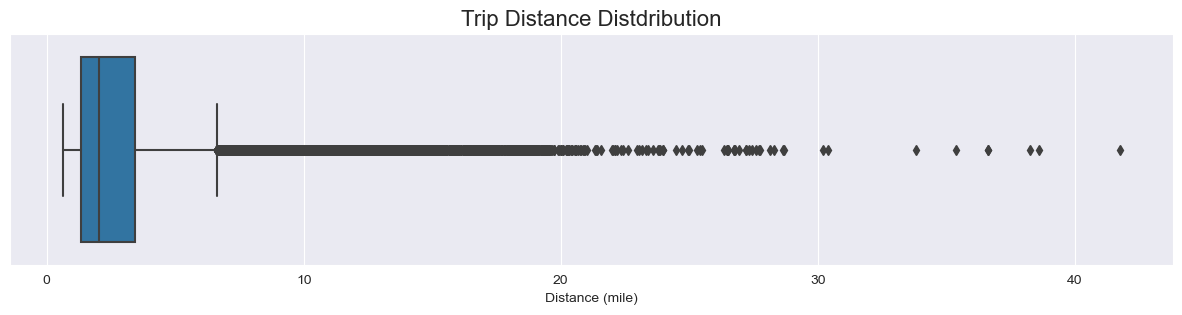

In [58]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distdribution', fontsize=16)

plt.show()

- Setelah selesai mengatasi extreme outliers selanjutnya mengatasi outliers biasa dengan cara membuat bins

In [59]:
bins_of_distance = [0, 2, 6, 10, np.inf] 
labels_of_distance = ['<2 miles', '3-6 miles', '7-10 miles', '>10 miles']

df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)

In [60]:
df['distance_bins'].value_counts()

<2 miles      29984
3-6 miles     24711
7-10 miles     4590
>10 miles      1543
Name: distance_bins, dtype: int64

## Feature Creation - Trip Duration

- Membuat fitur durasi perjelanan dari fitur pick up datetime dan drop off datetime

In [61]:
diff = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration'] = diff.round(2)

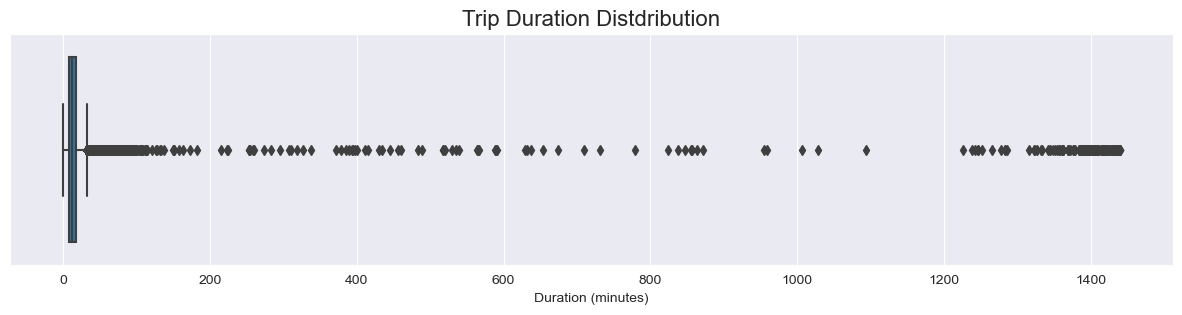

In [62]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)


plt.show()

- Perjalanan yang hanya berlangsung 1-2 menit bukanlah hal yang luar biasa,, Dengan kemungkinan bahwa taksi yang menempuh jarak kurang dari 2 menit merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop

In [63]:
print('Banyaknya data yang memiliki jarak kurang dari 2 menit:', len(df[df['trip_duration']<=2]))
df = df[df['trip_duration']>2]

Banyaknya data yang memiliki jarak kurang dari 2 menit: 130


- Sama seperti fitur distance sebelumnya, fitur durasi perjalanan juga terdapat extreme outliers

- Pertama ubah terlebih dahulu extreme outliers tersebut

In [64]:
df[df['trip_distance']==df['trip_distance'].max()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration
8072,2023-01-05 14:53:00,2023-01-05 16:19:20,Standard rate,130,1,1.0,41.74,114.0,0.0,1.0,1.0,Queens,Jamaica,EWR,Newark Airport,Noon,Weekdays,>10 miles,86.33



- Dengan jarak terjauh yang dimiliki yaitu 41.74 mil apabila di tempuh dengan kecepatan rata-rata terendah di Kota New York yaitu 10 mph maka waktu yang diperlukan yaitu 4.17 jam atau sekitar 250 menit. Maka dapat di asumsikan untuk durasi yang lebih dari 250 menit merupakan record extreme outliers (tidak wajar)

- Sama seperti fitur distance sebelumnya , kita akan coba ubah data extreme outliers dengan nilai central tendency (median) dari trip_duration untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [65]:
outliers = df[df['trip_duration']>250][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total extreme outliers : ', len(outliers))
outliers.head()

Total extreme outliers :  225


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23


In [66]:
ct_duration_byid = df[df['trip_duration']<250].groupby(['PULocationID', 'DOLocationID']).agg(count=('distance_bins', 'count'), 
                                                                                                 mean_duration=('trip_duration', 'mean'), 
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byid.sample(5, random_state=3)

,PULocationID,DOLocationID,count,mean_duration,median_duration
2105,83,10,1,25.500000,25.50
1142,52,237,1,37.270000,37.27
3070,134,130,15,8.686667,8.68
2560,112,62,2,19.340000,19.34
4170,220,136,1,14.550000,14.55


In [67]:
duration_byid = pd.merge(outliers, ct_duration_byid, on=['PULocationID', 'DOLocationID'], how='left')
duration_byid.drop(columns='count', axis=1, inplace=True)
duration_byid.index = outliers.index
display(duration_byid.head())

print('Hasil inputasi:')
df.loc[outliers.index, 'trip_duration'] = duration_byid['median_duration'].round(2)
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.47,24.526667,24.580
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02,12.232537,11.880
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48,22.133333,20.350
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02,12.302649,9.250
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23,23.145000,22.445


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,24.58
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,11.88
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,20.35
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,9.25
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,22.44


- Terdapat value NaN yang kemungkinan sama seperti kasus sebelumnya dimana tidak terdapat record yang sama pada PULocation dan DOLocationID untuk fitur trip_duration

- Maka isi NaN value tersebut mennggunakan central tendency (median) dengan referensi fitur PUBorough dan DOBorough yang sama

In [68]:
isna = df.loc[outliers.index][df['trip_duration'].isna()][['PUBorough', 'DOBorough', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total NaN Value : ', len(isna))
isna

Total NaN Value :  13


,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN
41975,Queens,Queens,2023-01-21 17:19:27,2023-01-22 00:00:00,NaN
42432,Brooklyn,Brooklyn,2023-01-21 20:29:58,2023-01-22 02:59:25,NaN
44216,Bronx,Bronx,2023-01-22 21:35:25,2023-01-23 20:42:11,NaN
52135,Bronx,Manhattan,2023-01-26 12:45:43,2023-01-27 00:00:00,NaN
56314,Brooklyn,Manhattan,2023-01-28 04:15:15,2023-01-29 03:58:28,NaN


In [69]:
ct_duration_byborough = df[df['trip_duration']<250].groupby(['PUBorough', 'DOBorough']).agg(count=('distance_bins', 'count'), 
                                                                                                 mean_duration=('trip_duration', 'mean'), 
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byborough.sample(10, random_state=5)

,PUBorough,DOBorough,count,mean_duration,median_duration
18,Queens,Manhattan,902,26.873925,24.86
2,Bronx,Manhattan,253,20.556403,17.78
17,Queens,EWR,7,58.354286,55.33
19,Queens,Queens,14086,13.154392,11.05
20,Staten Island,Brooklyn,1,36.550000,36.55
21,Staten Island,Staten Island,7,11.918571,8.80
10,Manhattan,Bronx,1431,17.177945,15.55
5,Brooklyn,Brooklyn,6006,16.416354,13.92
1,Bronx,Brooklyn,6,40.591667,42.00
13,Manhattan,Manhattan,33758,12.402218,10.80


In [70]:
duration_byborough = pd.merge(isna, ct_duration_byborough, on=['PUBorough', 'DOBorough'], how='left')
duration_byborough.drop(columns='count', axis=1, inplace=True)
duration_byborough.index = isna.index
display(duration_byborough.head())

print('Hasil inputasi:')
df.loc[isna.index, 'trip_duration'] = duration_byborough['median_duration'].round(2)
df.loc[isna.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN,13.154392,11.05
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN,16.416354,13.92
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN,16.416354,13.92
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN,13.154392,11.05
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN,26.873925,24.86


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,223,8,2023-01-01 13:07:46,2023-01-01 19:45:18,11.05
16126,17,256,2023-01-09 13:44:30,2023-01-10 11:07:20,13.92
29711,150,123,2023-01-15 17:52:52,2023-01-15 22:11:55,13.92
30240,129,16,2023-01-16 03:13:50,2023-01-17 00:00:00,11.05
40817,179,114,2023-01-21 03:09:37,2023-01-22 01:46:44,24.86


- Ketika mengubah time duration maka perlu mengubah juga waktu dropoff untuk semua entry yang telah terdampak oleh extreme outliers di atas

In [71]:
df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 00:47:39,24.58
108,260,223,2023-01-01 01:53:59,2023-01-01 02:05:52,11.88
118,129,37,2023-01-01 01:25:46,2023-01-01 01:46:07,20.35
207,129,129,2023-01-01 03:12:42,2023-01-01 03:21:57,9.25
262,65,37,2023-01-01 04:03:36,2023-01-01 04:26:02,22.44


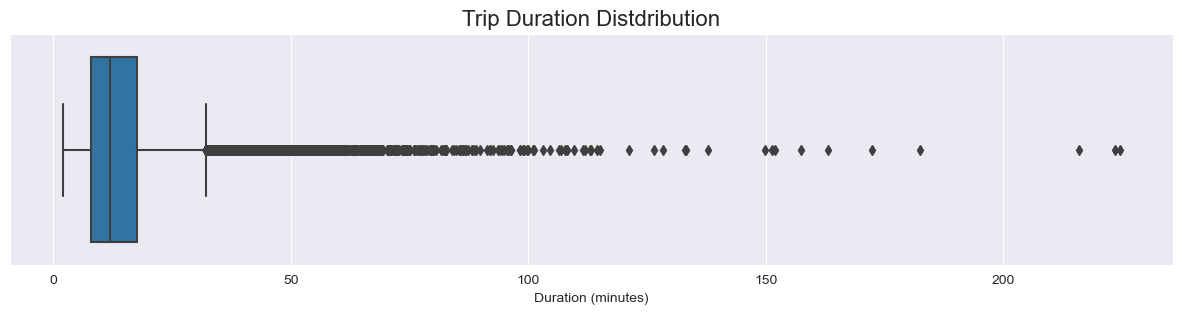

In [72]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)

plt.show()

- Setelah selesai mengatasi extreme outliers selanjutnya mengatasi outliers biasa dengan cara membuat bins

In [73]:
bins_of_duration = [0, 10, 20, 30, np.inf] 
labels_of_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '>30 minutes']

df['duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

In [74]:
df['duration_bins'].value_counts()

11-20 minutes    26030
<10 minutes      23321
21-30 minutes     7711
>30 minutes       3636
Name: duration_bins, dtype: int64

## Feature Creation - Driving Speed

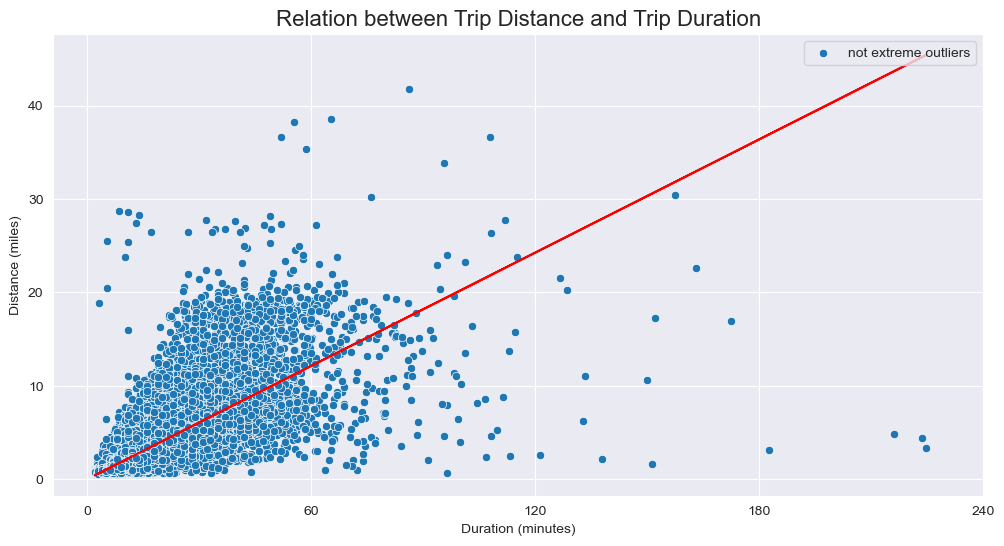

In [75]:
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0], label='not extreme outliers')

x, y = df['trip_duration'], df['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

`Insight`

- Hubungan antara fitur jarak dan durasi merupakan hubungan linear dimana jika jaraknya semakin jauh maka waktu yang dibutuhkan juga semakin besar

- Dari kedua fitur tersebut dapat menghasilkan fitur baru yaitu kecepatan

In [76]:
df['speed'] = (df['trip_distance'] / (df['trip_duration']/60)).round(2)

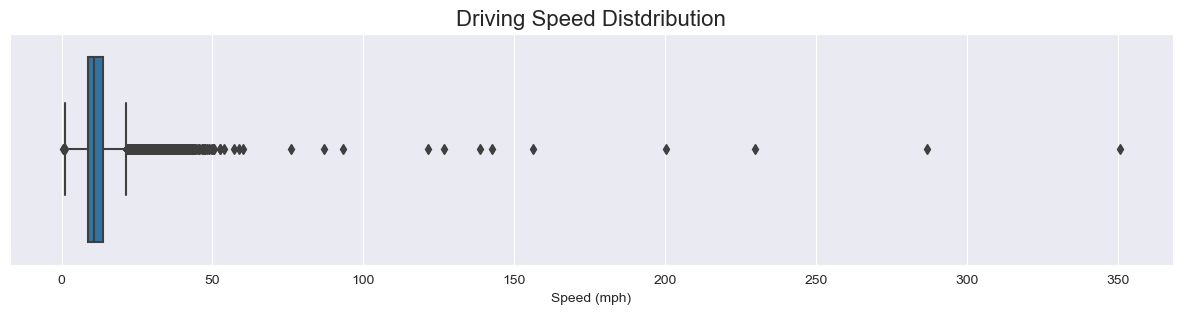

In [77]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.title('Driving Speed Distdribution', fontsize=16)

plt.show()

- Berdasarkan boxplot di atas terdapat extreme outliers pada fitur ini seperti kecepatan yang lebih dari 100 mph dan kurang dari 5 mph

- Berdasarkan data dari New York City Taxi and Limousine Commission (TLC) untuk periode sebelum 2021, kecepatan rata-rata taksi sering kali ditemukan berkisar antara 10 hingga 14 mph

- Namun, kecepatan ini dapat bervariasi tergantung kondisi keramaian lalu lintas, dengan kemungkinan adanya kemacetan maka toleransi kecepatan terendah yaitu lebih besar dari 5 mph

- Di New York sendiri kecepatan maksimal dalam kota adalah 25 mph sedangkan di jalan raya sekitar 65 mph

- Dengan toleransi 5 mph, maka toleransi kecepatan tertinggi yaitu 70 mph

In [78]:
outliers = df[(df['speed']<5) | (df['speed']>70)][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']]
print('Total extreme outliers : ', len(outliers))
outliers.sort_values(by='speed', ascending=True).head()

Total extreme outliers :  903


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
60667,2023-01-30 14:55:13,2023-01-30 16:31:28,0.64,<2 miles,96.25,>30 minutes,0.40
21587,2023-01-11 21:28:35,2023-01-12 00:00:00,1.63,<2 miles,151.42,>30 minutes,0.65
17029,2023-01-09 19:38:56,2023-01-09 20:51:12,1.03,<2 miles,72.27,>30 minutes,0.86
23872,2023-01-12 20:15:27,2023-01-13 00:00:00,3.32,3-6 miles,224.55,>30 minutes,0.89
23993,2023-01-12 21:42:06,2023-01-13 00:00:00,2.14,3-6 miles,137.90,>30 minutes,0.93


- Ketika terhubung ke fitur lain maka perlu diperiksa apakah terdapat contextual outliers seperti di bawah ini berdasarkan kecepatan taksi.

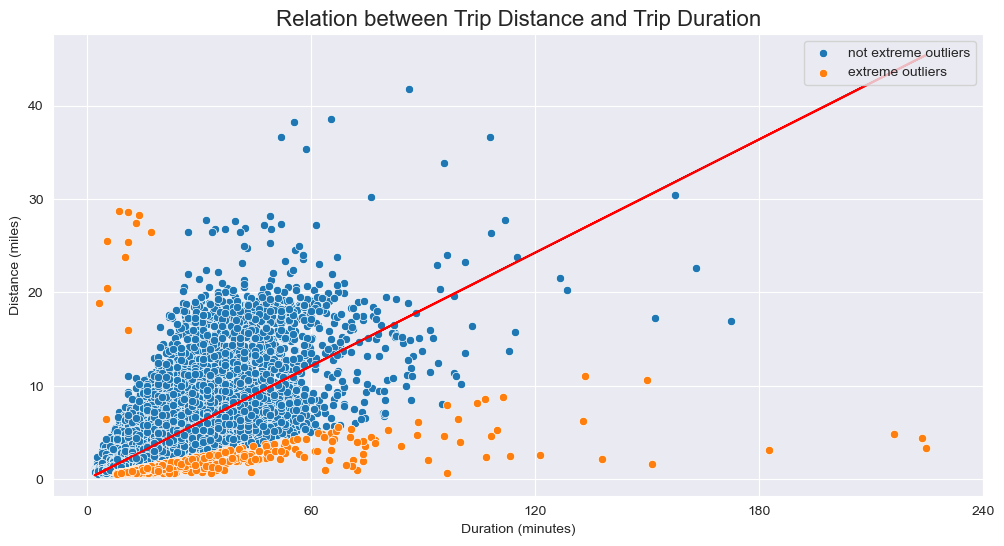

In [79]:
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0], label='not extreme outliers')
sns.scatterplot(outliers, x='trip_duration', y='trip_distance', color=color[1], label='extreme outliers')

x, y = df['trip_duration'], df['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

- Scatter berwarna biru merupakan titik kecepatan yang wajar yaitu diantara 5 - 70 mil per jam (mph)

- Sedangkan scatter berwarna orange merupakan titik kecepatan yang tidak wajar (extreme outliers) dimana kecepatannya di bawah 5 mph atau di atas 70 mph

In [80]:
ct_duration = df.loc[~df.index.isin(outliers.index)].groupby('distance_bins').agg(count=('distance_bins', 'count'), avg_speed=('speed', 'mean'), median_speed=('speed', 'median')).reset_index()
ct_duration

,distance_bins,count,avg_speed,median_speed
0,<2 miles,29168,10.153661,9.710
1,3-6 miles,24526,12.531054,11.430
2,7-10 miles,4571,18.964509,18.070
3,>10 miles,1530,23.496196,22.295


In [81]:
new_duration = pd.merge(outliers, ct_duration, on='distance_bins', how='left')
new_duration.index = outliers.index
new_duration.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed,count,avg_speed,median_speed
207,2023-01-01 03:12:42,2023-01-01 03:21:57,0.72,<2 miles,9.25,<10 minutes,4.67,29168,10.153661,9.710
545,2023-01-01 12:53:04,2023-01-01 14:10:09,4.26,3-6 miles,77.08,>30 minutes,3.32,24526,12.531054,11.430
556,2023-01-01 13:07:46,2023-01-01 13:18:49,16.00,>10 miles,11.05,11-20 minutes,86.88,1530,23.496196,22.295
648,2023-01-01 13:34:51,2023-01-01 13:59:58,1.86,<2 miles,25.12,21-30 minutes,4.44,29168,10.153661,9.710
769,2023-01-01 15:33:05,2023-01-01 16:03:34,1.15,<2 miles,30.48,>30 minutes,2.26,29168,10.153661,9.710


- ketika fitur speed di ubah maka akan berdampak ke beberapa fitur lainnya seperti durasi perjalanan, bin durasi dan waktu dropoff

In [82]:
df.loc[outliers.index, 'speed'] = new_duration['median_speed'].round(2)

time_duration = (df['trip_distance'] / df['speed']) * 60
df.loc[outliers.index, 'trip_duration'] = time_duration.round(2)
df.loc[outliers.index, 'duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']].head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
207,2023-01-01 03:12:42,2023-01-01 03:17:09,0.72,<2 miles,4.45,<10 minutes,9.71
545,2023-01-01 12:53:04,2023-01-01 13:15:26,4.26,3-6 miles,22.36,21-30 minutes,11.43
556,2023-01-01 13:07:46,2023-01-01 13:50:49,16.00,>10 miles,43.05,>30 minutes,22.30
648,2023-01-01 13:34:51,2023-01-01 13:46:20,1.86,<2 miles,11.49,11-20 minutes,9.71
769,2023-01-01 15:33:05,2023-01-01 15:40:12,1.15,<2 miles,7.11,<10 minutes,9.71


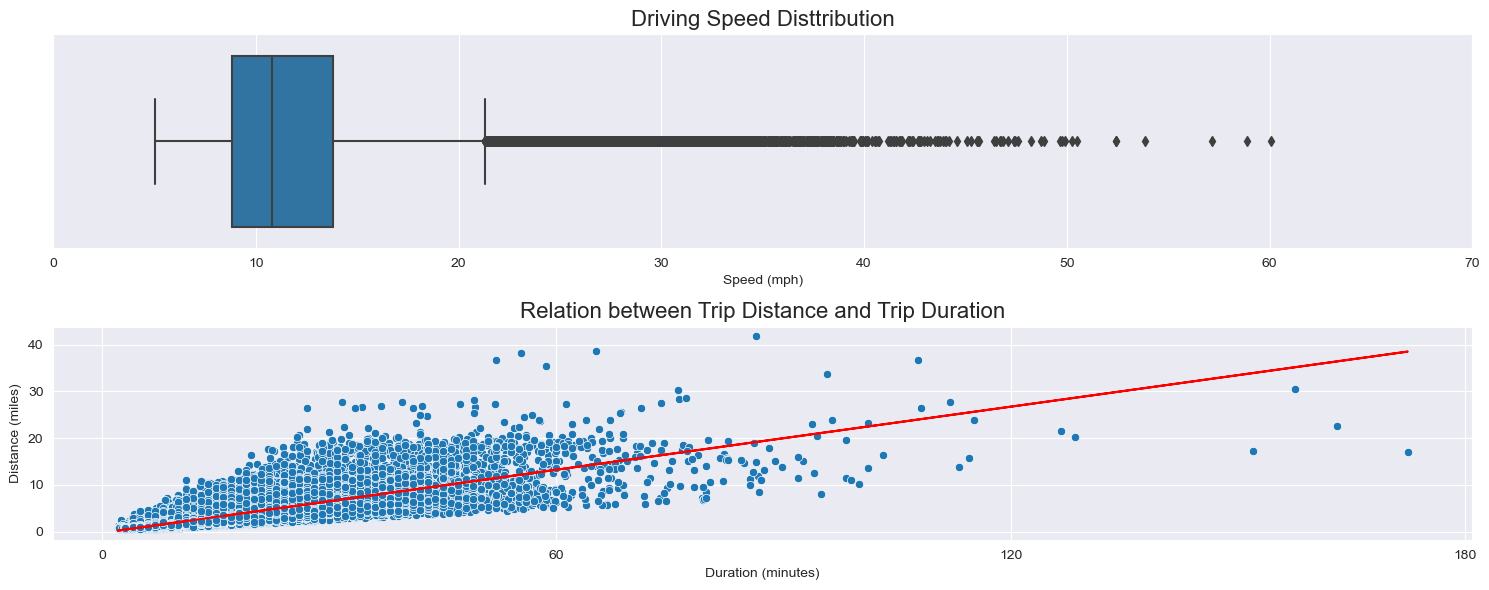

In [83]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.xticks(np.arange(0, 71, 10))
plt.title('Driving Speed Disttribution', fontsize=16)

plt.subplot(2, 1, 2)
sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0])
plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 181, 60))
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)

x, y = df['trip_duration'], df['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.tight_layout()
plt.show()

In [84]:
bins_of_speed = [0, 10, 20, 30, np.inf]
labels_of_speed = ['<10 mph', '11-20 mph', '21-30 mph', '>30 mph']
df['speed_bins'] = pd.cut(df['speed'], bins=bins_of_speed, labels=labels_of_speed)

In [85]:
df['speed_bins'].value_counts()

11-20 mph    30919
<10 mph      24913
21-30 mph     4148
>30 mph        718
Name: speed_bins, dtype: int64

## Amount

### Fare Amount

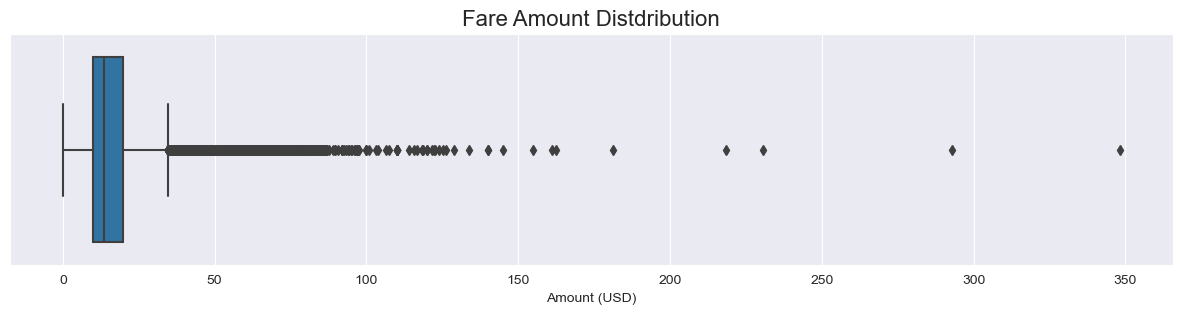

In [86]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='fare_amount', color=color[0])
plt.xlabel('Amount (USD)')
plt.title('Fare Amount Distdribution', fontsize=16)

plt.show()

- Berdasarkan korelasi sebelumnya, fare amount memiliki nilai korelasi yang tinggi terhadap trip distance yaitu sebesar 0.82

- Maka untuk menangani outliernya bisa dilihat berdasarkan kontekstual terhadap variabel tersebut

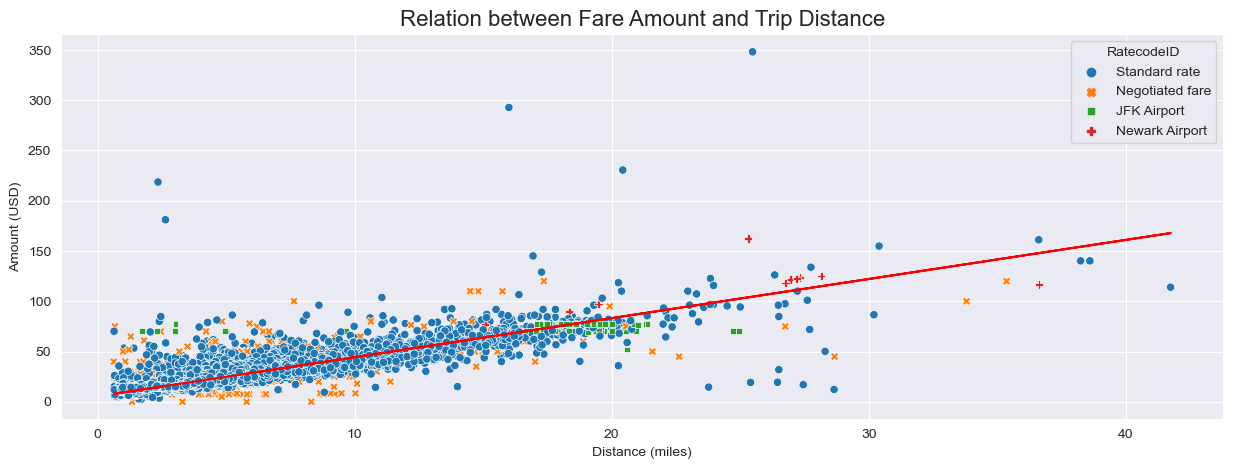

In [87]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = df['trip_distance'], df['fare_amount'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

`Insight`

- Hubungan antara Fare amount dan jarak secara umum memiliki hubungan linear dimana ketika jarak semakin jauh maka fare amount juga semakin tinggi.

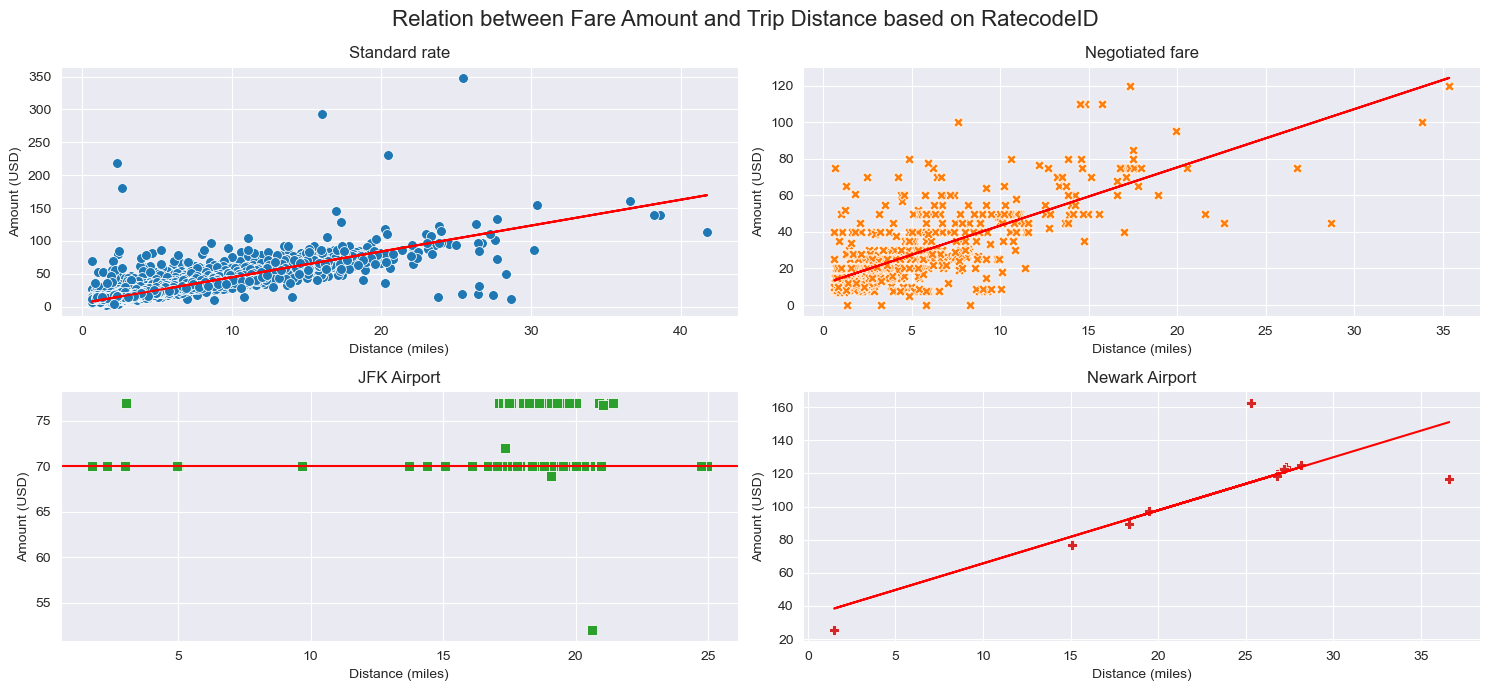

In [88]:
plt.figure(figsize=(15, 7))
plt.suptitle('Relation between Fare Amount and Trip Distance based on RatecodeID', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    subset = df[df['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

`Insight`

- Pada kategori tarif `'Standard Rate'` hubungan anatara jarak dan fare amount merupakan hubungan linear, dimana jika jarak yang ditempuh semakin jauh maka tarif dari fare amount juga semakin mahal (meningkat) namun terdapat beberapa outlier yang jauh dari garis linear.

- Begitu juga pada pada kategori tarif `'Negotiated Fare'`, hubungan anatara jarak dan fare amount merupakan hubungan linear, namun pada kategori ini scatter plot lebih tidak teratur dibanding 'standard rate'. Hal ini masih termasuk wajar karena kategori ini memungkinkan untuk melakukan negosiasi tarif, Namun tetap saja jika nilai negosiasi itu jauh dari penawaran pada umumnya akan dikatakan sebagai outliers

- Pada kategori tarif `'JFK Airport`' hubungan antara jarak dan fare amount tidak memiliki hubungan linear karena untuk tarif dari atau menuju JFK Airport memiliki Tarif flat awal yaitu 70 USD. Terdapat outliers dimana tarif dibawah 70 USD.

- Pada kategori tarif `'Newark Airport'` juga memiliki hubungan linear antara fitur jarak dan fare amount, karena data yang sedikit sehingga outliernya juga hanya beberapa.

In [89]:
outliers = pd.DataFrame()

mask_sr_1 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']>120) & (df['trip_distance']<20)
mask_sr_2 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']<60) & (df['trip_distance']>20)
mask_sr_3 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']>150) & (df['trip_distance']<30)
sr_outlier = df[mask_sr_1 | mask_sr_2 | mask_sr_3]
outliers = outliers.append(sr_outlier)

mask_nf_1 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']>99) & (df['trip_distance']<20)
mask_nf_2 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']<5) & (df['trip_distance']<10)
mask_nf_3 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']<60) & (df['trip_distance']>20)
mask_nf_4 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']>60) & (df['trip_distance']<10)
nf_outlier = df[mask_nf_1 | mask_nf_2 | mask_nf_3 | mask_nf_4]
outliers = outliers.append(nf_outlier)

mask_jfk = (df['RatecodeID']=='JFK Airport') & (df['fare_amount']<70)
jfk_outlier = df[mask_jfk]
outliers = outliers.append(jfk_outlier)

mask_ewr = (df['RatecodeID']=='Newark Airport') & (df['fare_amount']>160)
ewr_outlier = df[mask_ewr]
outliers = outliers.append(ewr_outlier)

print('Total standard rate outlier:',len(sr_outlier))
print('Total negotiated rate outlier:',len(nf_outlier))
print('Total JFK airport outlier:',len(jfk_outlier))
print('Total Newark airport outlier:',len(ewr_outlier))
print('Total seluruh outlier:',len(outliers))

outliers = outliers[['RatecodeID', 'distance_bins', 'fare_amount']]

outliers.head()

Total standard rate outlier: 16
Total negotiated rate outlier: 24
Total JFK airport outlier: 2
Total Newark airport outlier: 1
Total seluruh outlier: 43


,RatecodeID,distance_bins,fare_amount
556,Standard rate,>10 miles,292.8
2014,Standard rate,3-6 miles,218.6
7731,Standard rate,>10 miles,348.1
10393,Standard rate,>10 miles,59.0
12615,Standard rate,>10 miles,230.5


- Ubah nilai outlier tersebut dengan nilai central tendency (median) fare amount berdasarkan ratecodeID dan distance_bins pada dataset yang bukan outlier 

In [90]:
ct_amount = df[~df.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_bins']).agg(count=('fare_amount', 'count'), avg_fare=('fare_amount', 'mean'), median_fare=('fare_amount', 'median')).reset_index()
ct_amount.head()

,RatecodeID,distance_bins,count,avg_fare,median_fare
0,JFK Airport,<2 miles,1,70.000000,70.0
1,JFK Airport,3-6 miles,6,71.166667,70.0
2,JFK Airport,7-10 miles,1,70.000000,70.0
3,JFK Airport,>10 miles,142,71.885634,70.0
4,Negotiated fare,<2 miles,145,15.053034,12.0


In [91]:
new_fare = pd.merge(outliers, ct_amount, on=['RatecodeID', 'distance_bins'], how='left')
new_fare.drop(columns='count', inplace=True)
new_fare.index = outliers.index
display(new_fare.sample(5))

df.loc[outliers.index, 'fare_amount'] = new_fare['median_fare']
display(df.loc[outliers.index][['RatecodeID', 'distance_bins', 'fare_amount']].head())

,RatecodeID,distance_bins,fare_amount,avg_fare,median_fare
46141,Newark Airport,>10 miles,162.6,110.177778,118.2
28681,JFK Airport,>10 miles,52.0,71.885634,70.0
13245,Negotiated fare,3-6 miles,70.0,22.160000,20.0
182,Negotiated fare,3-6 miles,80.0,22.160000,20.0
18036,Negotiated fare,>10 miles,120.0,57.417241,50.0


,RatecodeID,distance_bins,fare_amount
556,Standard rate,>10 miles,52.17
2014,Standard rate,3-6 miles,17.70
7731,Standard rate,>10 miles,52.17
10393,Standard rate,>10 miles,52.17
12615,Standard rate,>10 miles,52.17


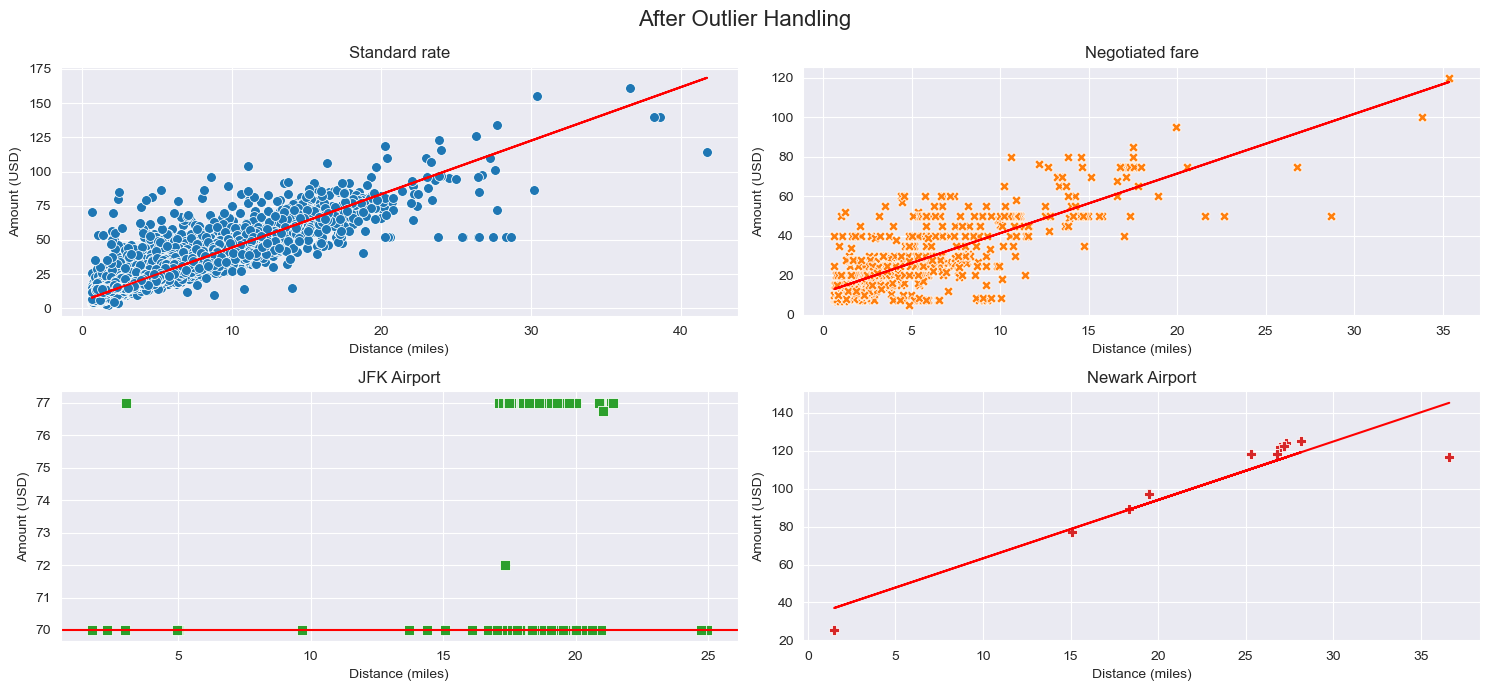

In [92]:
plt.figure(figsize=(15, 7))
plt.suptitle('After Outlier Handling', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    subset = df[df['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

- Untuk mengatasi outliers biasa maka dilakukan binning

In [93]:
bins_fare = [0, 20, 40, 60, np.inf]
labels_fare = ['<20$', '21-40$', '41-60$', '>60$']
df['fare_amount_bins'] = pd.cut(df['fare_amount'], bins=bins_fare, labels=labels_fare)

In [94]:
df['fare_amount_bins'].value_counts()

<20$      45978
21-40$    12274
41-60$     1846
>60$        600
Name: fare_amount_bins, dtype: int64

### Tip Amount

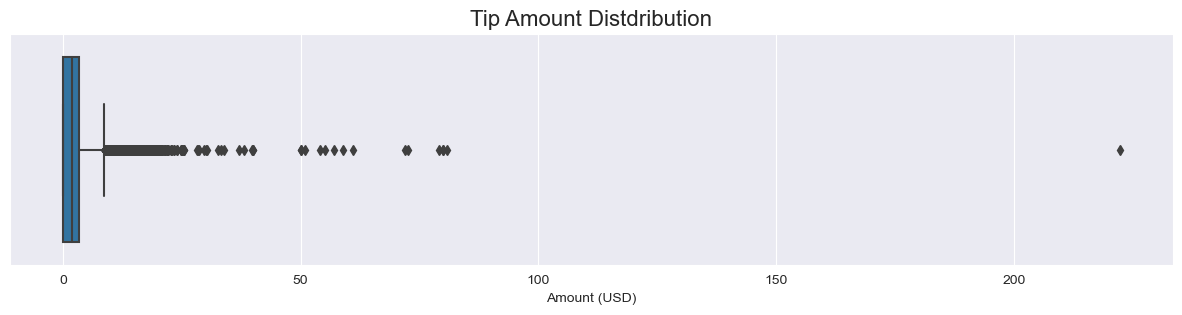

In [95]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='tip_amount', palette=color)
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distdribution', fontsize=16)

plt.show()

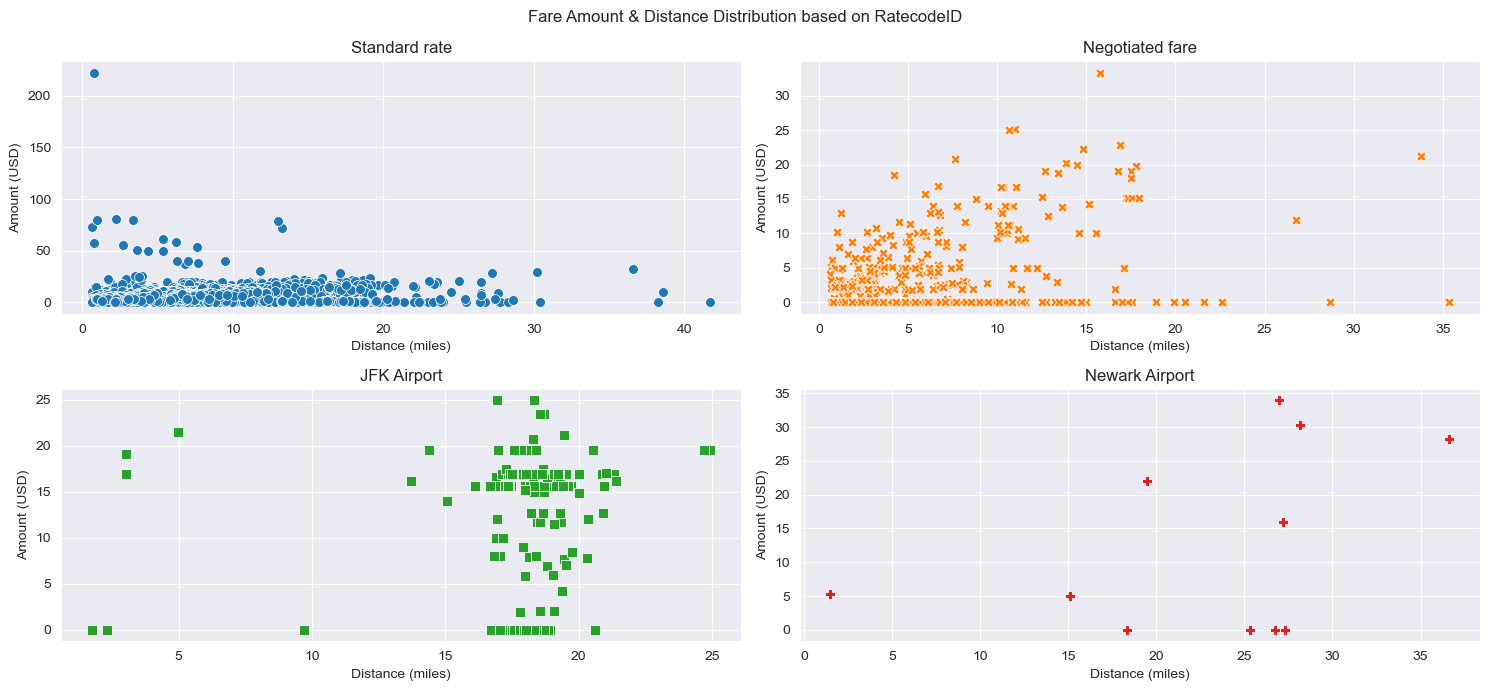

In [96]:
plt.figure(figsize=(15, 7))
plt.suptitle('Fare Amount & Distance Distribution based on RatecodeID')
markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

`Insight`

- Tidak ada hubungan antara jarak dan tip amount pada semua kategori

- Rentang tip amount pada kategori standar rate yaitu 0 sampai lebih 200, namun karne nilai yang lebih dari 200 ini hanya satu dan dan yang lebih dari 50 USD memiliki jaraknya kurang dari 20 mil maka titik ini merupakan data yang tidak wajar (extreme oulier). Maka rentang normal tip amount berada di 0-50 USD.

- Rentang tip amount pada kategori negotiated fare yaitu 0-35 USD.

- Rentang tip amount pada kategori JFK airport yaitu 0-25 USD.

- Rentang tip amount pada kategori Newark airport yaitu 0-35 USD.

- Berdasarkan visual, extreme outlier terlihat mulai dari nilai yang lebih besar dari 50

In [97]:
outliers = df[df['tip_amount']>50][['RatecodeID', 'distance_bins', 'fare_amount_bins', 'tip_amount']]
outliers

,RatecodeID,distance_bins,fare_amount_bins,tip_amount
297,Standard rate,7-10 miles,21-40$,54.00
16464,Standard rate,3-6 miles,21-40$,80.00
19464,Standard rate,>10 miles,41-60$,72.00
20685,Standard rate,<2 miles,<20$,72.55
24979,Standard rate,3-6 miles,21-40$,61.00
31679,Standard rate,>10 miles,41-60$,79.00
32984,Standard rate,3-6 miles,21-40$,51.00
38664,Standard rate,3-6 miles,<20$,80.88
40892,Standard rate,<2 miles,<20$,80.00
44718,Standard rate,3-6 miles,<20$,55.05


In [98]:
ct_amount = df[~df.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_bins', 'fare_amount_bins']).agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index()
ct_amount.head()

,RatecodeID,distance_bins,fare_amount_bins,count,avg_tip,median_tip
0,JFK Airport,<2 miles,<20$,0,NaN,NaN
1,JFK Airport,<2 miles,21-40$,0,NaN,NaN
2,JFK Airport,<2 miles,41-60$,0,NaN,NaN
3,JFK Airport,<2 miles,>60$,1,0.0,0.0
4,JFK Airport,3-6 miles,<20$,0,NaN,NaN


In [99]:
new_tip = pd.merge(outliers, ct_amount, on=['RatecodeID', 'distance_bins', 'fare_amount_bins'], how='left')
new_tip.drop(columns='count', inplace=True)
new_tip.index = outliers.index
display(new_tip.sample(5))

df.loc[outliers.index, 'tip_amount'] = new_tip['median_tip']
display(df.loc[outliers.index][['RatecodeID', 'distance_bins', 'fare_amount', 'tip_amount']])

,RatecodeID,distance_bins,fare_amount_bins,tip_amount,avg_tip,median_tip
31679,Standard rate,>10 miles,41-60$,79.00,5.514281,5.00
44718,Standard rate,3-6 miles,<20$,55.05,2.296573,2.56
24979,Standard rate,3-6 miles,21-40$,61.00,3.168055,3.00
16464,Standard rate,3-6 miles,21-40$,80.00,3.168055,3.00
20685,Standard rate,<2 miles,<20$,72.55,1.446475,1.50


,RatecodeID,distance_bins,fare_amount,tip_amount
297,Standard rate,7-10 miles,33.8,5.00
16464,Standard rate,3-6 miles,26.1,3.00
19464,Standard rate,>10 miles,56.2,5.00
20685,Standard rate,<2 miles,8.6,1.50
24979,Standard rate,3-6 miles,26.8,3.00
31679,Standard rate,>10 miles,49.2,5.00
32984,Standard rate,3-6 miles,25.4,3.00
38664,Standard rate,3-6 miles,14.2,2.56
40892,Standard rate,<2 miles,7.2,1.50
44718,Standard rate,3-6 miles,17.7,2.56


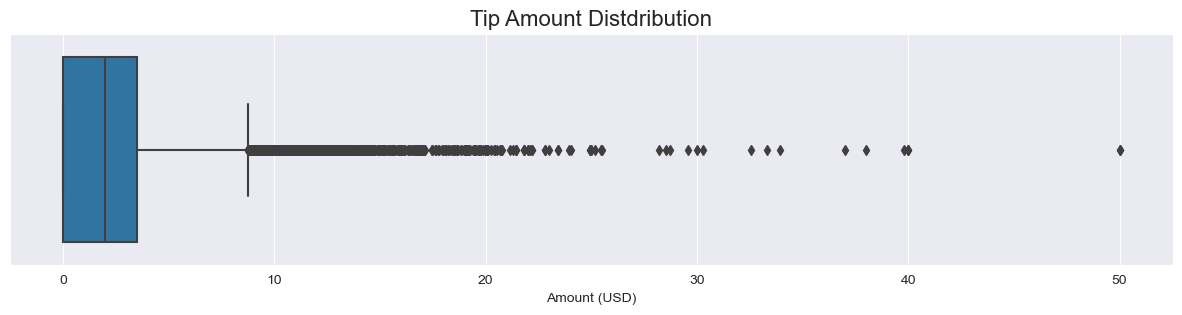

In [100]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='tip_amount', color=color[0])
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distdribution', fontsize=16)

plt.show()

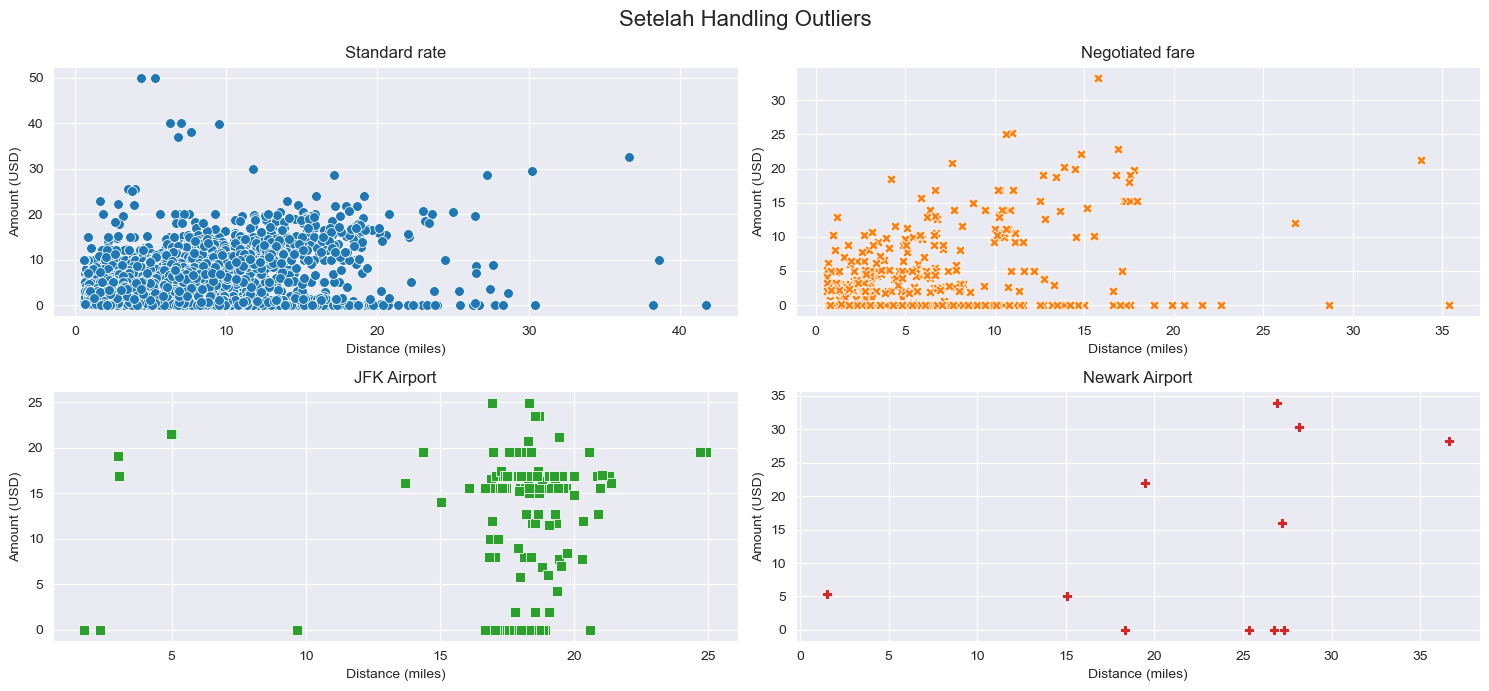

In [101]:
plt.figure(figsize=(15, 7))
plt.suptitle('Setelah Handling Outliers', fontsize=16)

markers=['o','X','s','P']

for i, val in enumerate(df['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

- Outliers biasa di ubah dengan melakukan disktritisasi seperti binning

In [102]:
bins_tip = [-np.inf, 0, 5, 10, 15, np.inf]
labels_tip = ['0$', '1-5$', '6-10$', '11-15$', '>15$']
df['tip_amount_bins'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=labels_tip)

In [103]:
df['tip_amount_bins'].value_counts()

1-5$      29821
0$        23683
6-10$      6191
11-15$      744
>15$        259
Name: tip_amount_bins, dtype: int64

## Payment Types

In [104]:
df['payment_type']=df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
df['payment_type'].value_counts()

Credit card    40261
Cash           19885
Unknown          435
No charge         98
Dispute           19
Name: payment_type, dtype: int64

## Trip Type

In [105]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

Street-hail    60150
Dispatch         548
Name: trip_type, dtype: int64

# Setting Column Index

In [106]:
df.head(2)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration,duration_bins,speed,speed_bins,fare_amount_bins,tip_amount_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,Credit card,Street-hail,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Midnight,Weekend,3-6 miles,11.02,11-20 minutes,14.05,11-20 mph,<20$,1-5$
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,Credit card,Street-hail,Manhattan,Bloomingdale,Manhattan,Central Park,Midnight,Weekend,<2 miles,6.77,<10 minutes,16.04,11-20 mph,<20$,1-5$


In [107]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone', 'pickup_time', 'day_category',
       'distance_bins', 'trip_duration', 'duration_bins', 'speed',
       'speed_bins', 'fare_amount_bins', 'tip_amount_bins'],
      dtype='object')

In [108]:
df = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'day_category', 'pickup_time', 'RatecodeID', 'PULocationID','PUBorough', 'PUZone', 'DOLocationID', 'DOBorough', 'DOZone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'fare_amount_bins', 'tip_amount', 'tip_amount_bins', 'payment_type', 'trip_type', 'trip_duration', 'duration_bins', 'speed', 'speed_bins']]
df

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,distance_bins,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-6 miles,14.90,<20$,4.03,1-5$,Credit card,Street-hail,11.02,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,10.70,<20$,2.64,1-5$,Credit card,Street-hail,6.77,<10 minutes,16.04,11-20 mph
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,6.50,<20$,1.70,1-5$,Credit card,Street-hail,5.82,<10 minutes,13.40,11-20 mph
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,6.00,<20$,0.00,0$,Credit card,Street-hail,5.97,<10 minutes,11.06,11-20 mph
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-6 miles,17.70,<20$,0.00,0$,Cash,Street-hail,17.55,11-20 minutes,9.50,<10 mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Weekdays,Night,Standard rate,49,Brooklyn,Clinton Hill,62,Brooklyn,Crown Heights South,1.0,2.31,3-6 miles,15.70,<20$,0.00,0$,Unknown,Street-hail,13.00,11-20 minutes,10.66,11-20 mph
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Weekdays,Night,Standard rate,10,Queens,Baisley Park,205,Queens,Saint Albans,1.0,2.14,3-6 miles,4.41,<20$,0.00,0$,Unknown,Street-hail,8.00,<10 minutes,16.05,11-20 mph
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Weekdays,Night,Standard rate,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,Bushwick South,1.0,3.44,3-6 miles,16.53,<20$,3.51,1-5$,Credit card,Street-hail,16.00,11-20 minutes,12.90,11-20 mph
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Weekdays,Night,Standard rate,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,Prospect Heights,1.0,3.03,3-6 miles,14.98,<20$,3.20,1-5$,Credit card,Street-hail,18.00,11-20 minutes,10.10,11-20 mph


<Axes: >

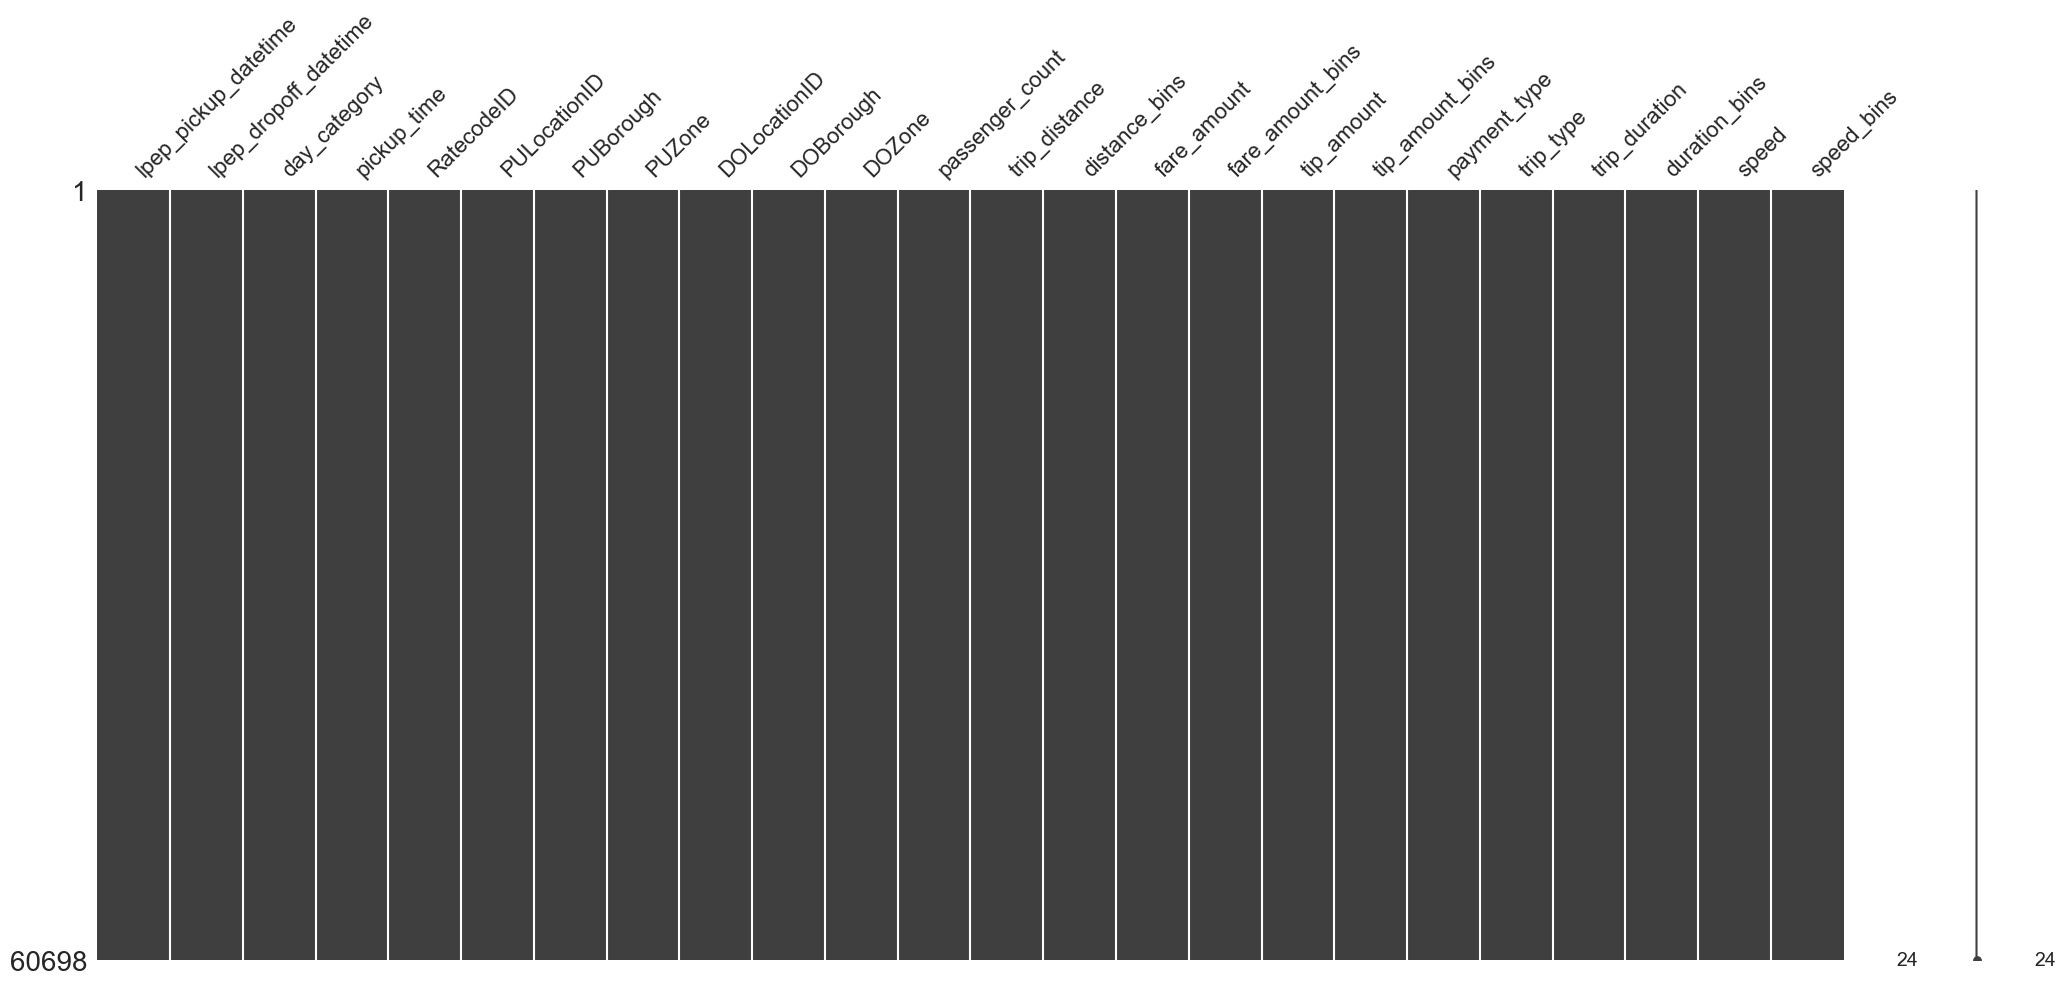

In [109]:
msno.matrix(df)

In [110]:
# df.to_csv(r'NYC TLC Trip Record - Clean.csv', index= False)